        mpg  cylinders  displacement    weight  acceleration  model year  \
USA  5000.8       1556       61229.5  837121.0        3743.4       18827   
EU   1952.4        291        7640.0  169631.0        1175.1        5307   
JPN  2405.6        324        8114.0  175477.0        1277.6        6118   

     count  
USA    249  
EU      70  
JPN     79  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
 9   count         398 non-null    int64  
dtypes: float64(4), in

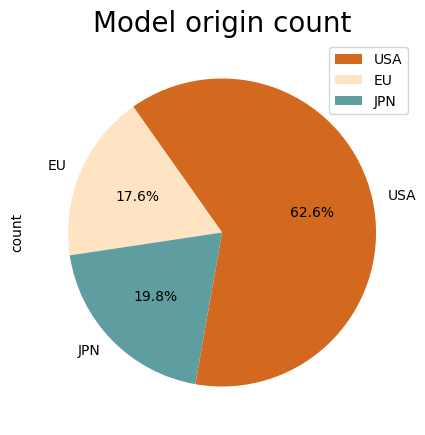

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 

font_path = "C:\\Windows\\Fonts\\malgun.ttf"
font_name = font_manager.FontProperties(fname= font_path).get_name()
rc("font", family=font_name)

df = pd.read_csv("File\\auto-mpg.csv", header=None)

df.columns = ["mpg", 
              "cylinders", 
              "displacement",
              "horsepower", 
              "weight", 
              "acceleration", 
              "model year", 
              "origin", 
              "name"]

df["count"] = 1 
df_origin = df.groupby(["origin"]).sum()
df_origin.index = ["USA", "EU", "JPN"]

plt.style.use("default")
df_origin["count"].plot(kind="pie", 
                        figsize=(15, 5),
                        autopct="%.1f%%", 
                        startangle=260,
                        colors=["chocolate", "bisque", "cadetblue"]
                        )

plt.title("Model origin count", size=20)
plt.legend(labels = df_origin.index, loc="best")

print(df_origin.head(n=5))
print(df.info())

{'whiskers': [<matplotlib.lines.Line2D at 0x1a71d7f5880>,
 'caps': [<matplotlib.lines.Line2D at 0x1a71d7f5e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a71d7f55b0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a71d7fe400>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a71d7fe6d0>,
 'means': []}

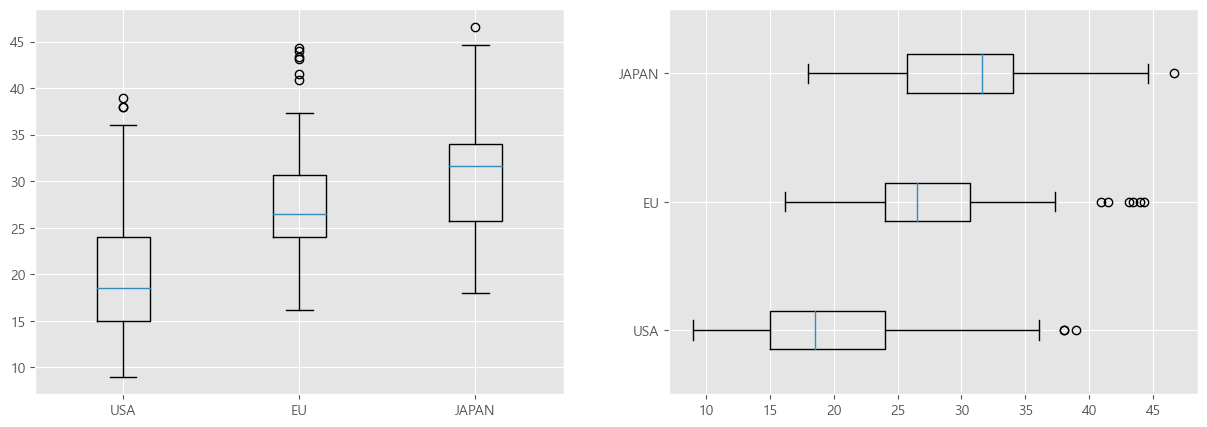

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 

font_path = "C:\\Windows\\Fonts\\malgun.ttf"
font_name = font_manager.FontProperties(fname= font_path).get_name()
rc("font", family=font_name)

plt.style.use("ggplot")

df = pd.read_csv("File\\auto-mpg.csv", header=None)

df.columns = ["mpg", 
              "cylinders", 
              "displacement",
              "horsepower", 
              "weight", 
              "acceleration", 
              "model year", 
              "origin", 
              "name"]

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(x=[df[df["origin"]==1]["mpg"],
               df[df["origin"]==2]["mpg"],
               df[df["origin"]==3]["mpg"]],
            labels=["USA", "EU", "JAPAN"])

ax2.boxplot(x=[df[df["origin"]==1]["mpg"],
               df[df["origin"]==2]["mpg"],
               df[df["origin"]==3]["mpg"]],
            labels=["USA", "EU", "JAPAN"], 
            vert=False)

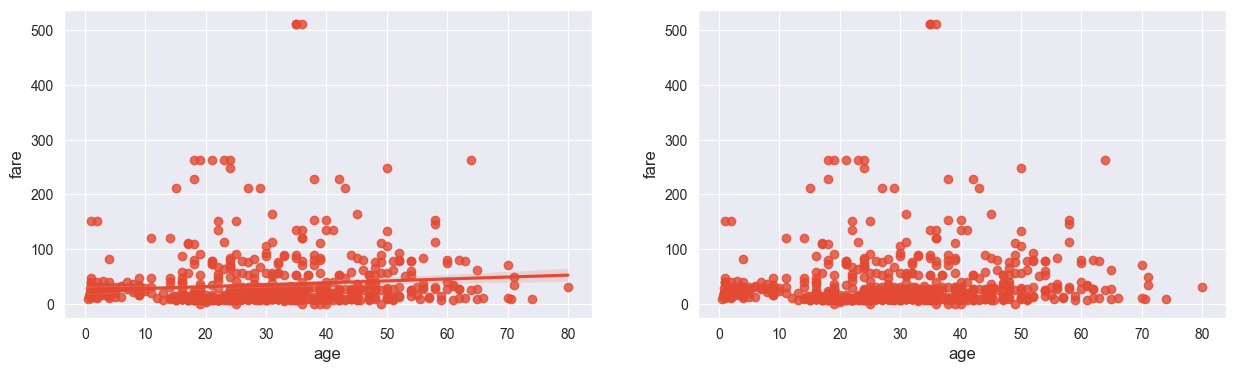

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt 

titanic = sns.load_dataset("titanic")
sns.set_style("darkgrid")

fig= plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x="age",
            y="fare",
            data=titanic,
            ax=ax1)


sns.regplot(x="age",
            y="fare",
            data=titanic,
            ax=ax2,
            fit_reg=False)
plt.show()

C:\Users\lio22\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


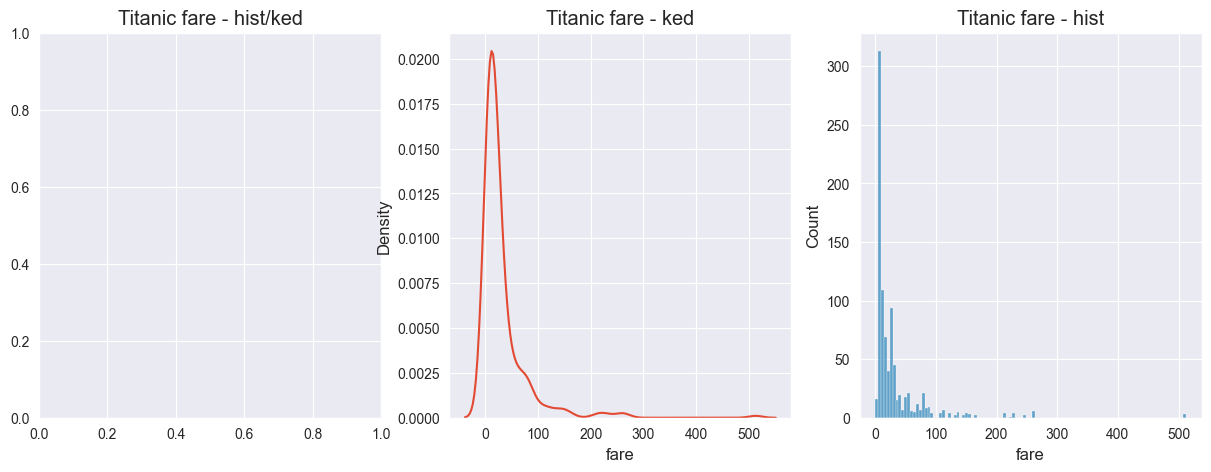

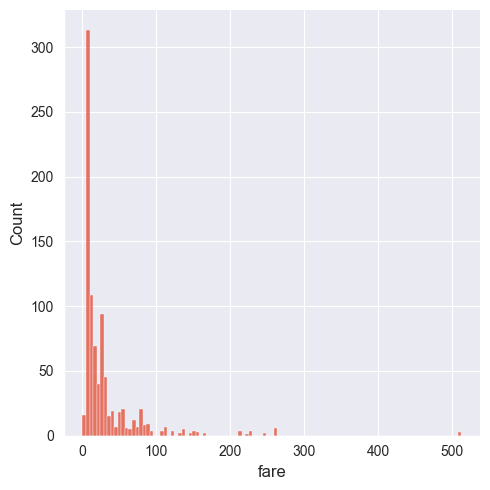

In [22]:
import seaborn as sns 
import matplotlib.pyplot
titanic = sns.load_dataset("titanic")

sns.set_style("darkgrid")

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.displot(titanic["fare"], ax=ax1)
sns.kdeplot(x="fare", data=titanic, ax=ax2)
sns.histplot(x="fare", data=titanic, ax=ax3)

ax1.set_title("Titanic fare - hist/ked")
ax2.set_title("Titanic fare - ked")
ax3.set_title("Titanic fare - hist")

plt.show()

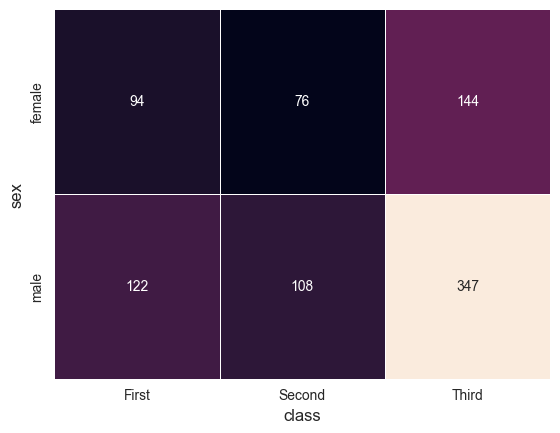

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic")
# table = titanic.pivot_table(index="sex", columns="class", aggfunc="size")
table = titanic.pivot_table(index="sex", columns="class", aggfunc="size")
sns.heatmap(table, 
            annot=True, 
            fmt= "d", 
            linewidths=.5, 
            cbar=False
            )

plt.show()